<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/SVM%2C%E5%BC%82%E5%B8%B8%E7%82%B9%E6%A3%80%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
from sklearn import svm

In [5]:
# 模拟数据产生
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# 产生训练数据
X = 0.3 * np.random.randn(100, 2)
print(X.shape)

(100, 2)


In [8]:
X_train = np.r_[X + 2, X - 2]  # np.r_：是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
print(X_train.shape)


(200, 2)


In [14]:
# 产测试数据
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# 产生一些异常点数据
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))


In [12]:
# 模型训练
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.01, shrinking=True, tol=0.001, verbose=False)

In [15]:
# 预测结果获取
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [16]:
# 返回1表示属于这个类别，-1表示不属于这个类别
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

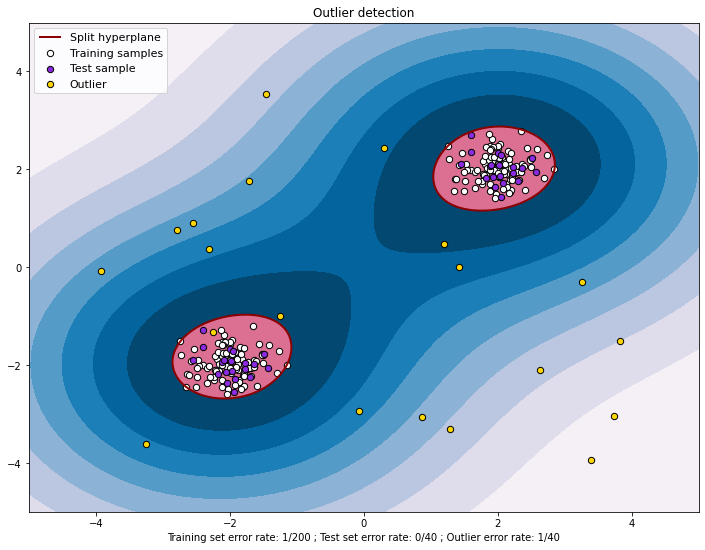

In [20]:
# 获取绘图的点信息
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  #np.c_：是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。
Z = Z.reshape(xx.shape)

# 画图
plt.figure(facecolor='w',figsize=(12,9))
plt.title("Outlier detection")

# 画出区域图
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 9), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# 画出点图
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')


# 设置相关信息
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["Split hyperplane", "Training samples", "Test sample", "Outlier"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel("Training set error rate: %d/200 ; Test set error rate: %d/40 ; Outlier error rate: %d/40" \
           % (n_error_train, n_error_test, n_error_outliers))
plt.show()